This code is an attempt to simulate the CMB (again) for further analysis using machine learning.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import healpy as hp
import numpy as np

Healpy documentation:
https://healpy.readthedocs.io/en/latest/generated/healpy.sphtfunc.synfast.html

In [4]:
NSIDE = 32
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 32 is 1.8 deg


In [5]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

12288


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


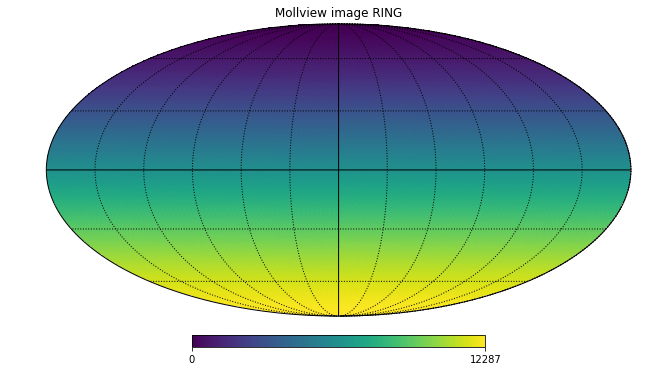

In [6]:
m = np.arange(NPIX)
hp.mollview(m, title="Mollview image RING")
hp.graticule()

In [7]:
vec = hp.ang2vec(np.pi / 2, np.pi * 3 / 4)
print(vec)

[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


In [8]:
ipix_disc = hp.query_disc(nside=32, vec=vec, radius=np.radians(10))

In [9]:
theta, phi = np.degrees(hp.pix2ang(nside=32, ipix=[0, 1, 2, 3, 4]))

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


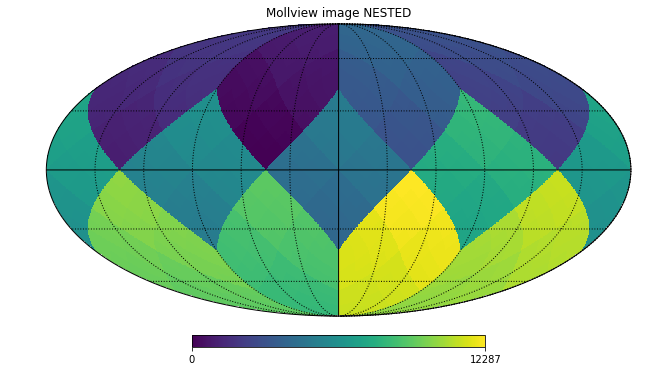

In [12]:
m = np.arange(NPIX)
hp.mollview(m, nest=True, title="Mollview image NESTED")
hp.graticule()

In [13]:
vec = hp.ang2vec(np.pi / 2, np.pi * 3 / 4)
print(vec)

[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


In [14]:
ipix_disc = hp.query_disc(nside=32, vec=vec, radius=np.radians(10))

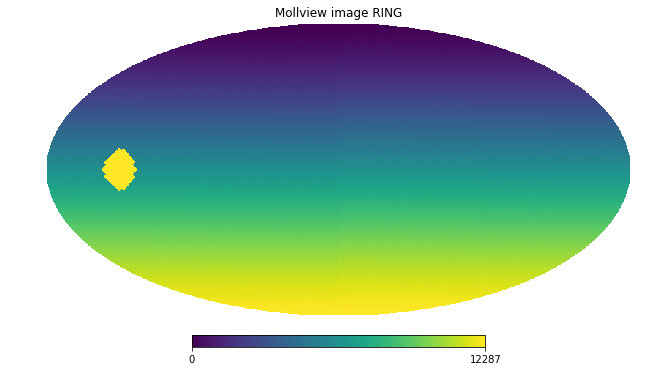

In [15]:
m = np.arange(NPIX)
m[ipix_disc] = m.max()
hp.mollview(m, title="Mollview image RING")

In [16]:
theta, phi = np.degrees(hp.pix2ang(nside=32, ipix=[0, 1, 2, 3, 4]))